In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('dataset_sudeste_simples_realista_outliers-1K.csv')
print(df.head(10))

   id  idade     renda          cidade categoria  nota feedback
0   1   25.0   9508.30  Belo Horizonte         A   2.6  Regular
1   2   53.0   2346.15       São Paulo         A   1.6     Ruim
2   3   52.0   7578.47         Vitória         B   7.8  Regular
3   4   52.0  12940.35       São Paulo         B   9.4  Regular
4   5   59.0   4343.05         Vitória         A   3.9     Ruim
5   6   50.0   2633.01         Vitória         B   5.0     Ruim
6   7   67.0  10292.08  Rio de Janeiro         B   9.2     Ruim
7   8   47.0  11543.19       São Paulo         A   6.3     Ruim
8   9   33.0   5706.43  Rio de Janeiro         A   9.3     Ruim
9  10   60.0   8907.23       São Paulo         A   8.4      Bom


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1000 non-null   int64  
 1   idade      991 non-null    float64
 2   renda      983 non-null    float64
 3   cidade     987 non-null    object 
 4   categoria  993 non-null    object 
 5   nota       989 non-null    float64
 6   feedback   991 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB
None


In [4]:
df.describe()

,id,idade,renda,nota
count,1000.000000,991.000000,983.000000,989.000000
mean,500.500000,43.344097,7231.996948,5.012639
std,288.819436,16.636265,3759.558767,2.967068
min,1.000000,3.000000,431.210000,-1.400000
25%,250.750000,28.000000,4154.685000,2.400000
50%,500.500000,44.000000,7224.560000,5.000000
75%,750.250000,57.000000,10234.930000,7.500000
max,1000.000000,112.000000,38099.880000,14.700000


In [5]:
print(df.isnull().sum())

id            0
idade         9
renda        17
cidade       13
categoria     7
nota         11
feedback      9
dtype: int64


In [6]:
imputer_media = SimpleImputer(strategy='mean')
df[['idade', 'nota']] = imputer_media.fit_transform(df[['idade', 'nota']])

In [7]:
imputer_mediana = SimpleImputer(strategy='median')
df[['renda']] = imputer_mediana.fit_transform(df[['renda']])

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

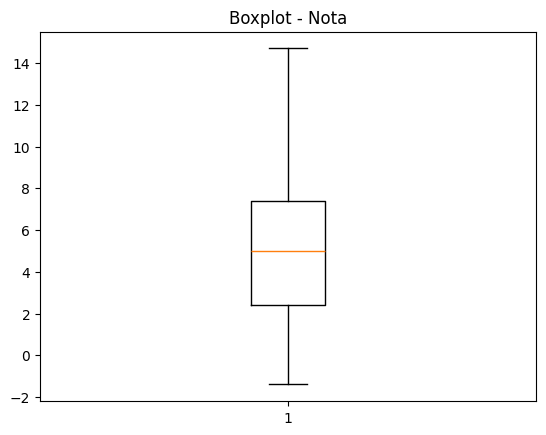

In [9]:
plt.boxplot(df['nota'])
plt.title("Boxplot - Nota")
plt.show()

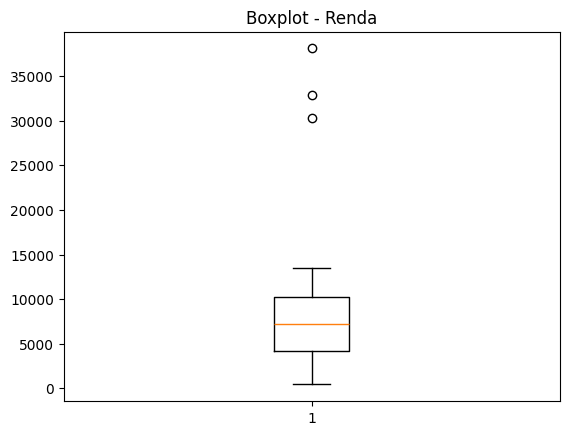

In [10]:
plt.boxplot(df['renda'])
plt.title("Boxplot - Renda")
plt.show()

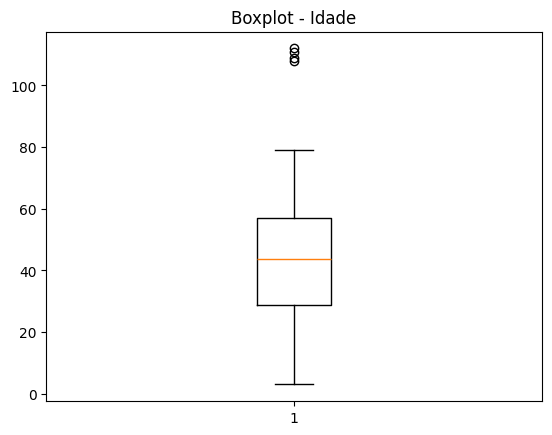

In [11]:
plt.boxplot(df['idade'])
plt.title("Boxplot - Idade")
plt.show()

In [12]:
# Realiza a códificação das coluas
#encoder = OneHotEncoder(sparse_output=False, drop='first')  
encoder = OneHotEncoder(sparse_output=False)  

#categorias_codificadas = encoder.fit_transform(df[['cidade', 'categoria', 'feedback']])
categorias_codificadas = encoder.fit_transform(df[['cidade']])

# Converter os resultados do encoding para um DataFrame
#df_categorias = pd.DataFrame(categorias_codificadas, columns=encoder.get_feature_names_out(['cidade', 'categoria', 'feedback']))
df_categorias = pd.DataFrame(categorias_codificadas, columns=encoder.get_feature_names_out(['cidade']))

# Resetar o índice do df original e concatenar com as novas colunas
df_final = pd.concat([df.reset_index(drop=True), df_categorias], axis=1)

# Remover as colunas categóricas originais (sem usar inplace)
#df_final = df_final.drop(['cidade', 'categoria', 'feedback'], axis=1)
df_final = df_final.drop(['cidade'], axis=1)

In [13]:
print(df_final.head())

   id  idade     renda categoria  nota feedback  cidade_Belo Horizonte  \
0   1   25.0   9508.30         A   2.6  Regular                    1.0   
1   2   53.0   2346.15         A   1.6     Ruim                    0.0   
2   3   52.0   7578.47         B   7.8  Regular                    0.0   
3   4   52.0  12940.35         B   9.4  Regular                    0.0   
4   5   59.0   4343.05         A   3.9     Ruim                    0.0   

   cidade_Rio de Janeiro  cidade_São Paulo  cidade_Vitória  cidade_nan  
0                    0.0               0.0             0.0         0.0  
1                    0.0               1.0             0.0         0.0  
2                    0.0               0.0             1.0         0.0  
3                    0.0               1.0             0.0         0.0  
4                    0.0               0.0             1.0         0.0  


In [14]:
scaler = StandardScaler()
df_final[['idade', 'renda', 'nota']] = scaler.fit_transform(df_final[['idade', 'renda', 'nota']])
print(df_final[['idade','renda','nota']].head(10))

      idade     renda      nota
0 -1.108212  0.611029 -0.818062
1  0.583337 -1.311402 -1.157136
2  0.522924  0.093033  0.945121
3  0.522924  1.532244  1.487638
4  0.945812 -0.775404 -0.377267
5  0.402100 -1.234405 -0.004286
6  1.429111  0.821407  1.419824
7  0.220862  1.157224  0.436510
8 -0.624912 -0.409452  1.453731
9  1.006224  0.449692  1.148565


In [15]:
df_final[['idade','renda','nota']].describe()

,idade,renda,nota
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.643130e-16,-1.048051e-16,-2.859935e-16
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.437286e+00,-1.825402e+00,-2.174357e+00
25%,-8.816654e-01,-8.089208e-01,-8.858770e-01
50%,1.981236e-02,-1.962256e-03,-4.285561e-03
75%,8.249868e-01,7.989442e-01,8.094911e-01
max,4.147672e+00,8.285448e+00,3.284728e+00


In [16]:
import json

# Converter para lista de dicionários (documentos MongoDB)
dados_mongo = df_final.to_dict(orient='records')

# Salvar como JSON
with open('Dataset_Simples_Realista_Fase1.json', 'w', encoding='utf-8') as f:
    json.dump(dados_mongo, f, ensure_ascii=False, indent=2)

print("Arquivo salvo com sucesso para importação no MongoDB Atlas!")

Arquivo salvo com sucesso para importação no MongoDB Atlas!


In [18]:
df_final.to_csv('.\Dataset_Simples_Realista_Fase1.csv', index=False)

In [ ]:
print (f"Dados de Treino - Features \n\n{X_train.head(5)} \n\n\n")
print (f"Dados de Treino - Targets \n\n{y_train.head(5)} \n\n\n")

print (f"Dados de Teste - Features \n\n{X_test.head(5)} \n\n\n")
print (f"Dados de Teste - Targets \n\n{y_test.head(5)} \n\n\n")